# Exploration of the test file

In [1]:
# Libraries
#----------------------------------------------
import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt #to plot graphs
import matplotlib.patches as mpatches #to customize legend
import seaborn as sns #to plot graphs
import math 
import re #to find integers & floats in a string 
from collections import Counter #to count values in a dataframe or array
from datetime import date, timedelta, datetime #for the date
import datetime as dt

In [2]:
# Lecture du fichier des données tests
#----------------------------------------------
PATH = '.' #modifier si besoin le chemin du fichier
data = pd.read_csv(PATH + '//test_set.csv')

# Assigner le bon type aux variables
#----------------------------------------------
data.drop("index",axis=1,inplace=True) #enlève la colonne index
#--- Convert to integer: 
int_list = ["order_requests","date","avatar_id","hotel_id","stock"]
data[int_list] = data[int_list].astype(int) 
#--- Convert to categorical: 
data["city"] = pd.Categorical(data["city"],ordered=False)
data["language"] = pd.Categorical(data["language"],ordered=False)
data["mobile"] = pd.Categorical(data["mobile"],ordered=False)

data.head()

,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,1,vilnius,21,romanian,0,1,161,46
1,1,vilnius,21,romanian,0,1,187,32
2,1,vilnius,21,romanian,0,1,279,12
3,1,vilnius,21,romanian,0,1,395,10
4,1,vilnius,21,romanian,0,1,488,42


In [3]:
# Lecture du fichier des features hotels
#----------------------------------------------
featuresHotels = pd.read_csv(PATH + "\\features_hotels.csv")
# on merge les fichiers featuresHotels et data selon la colonne "hotel_id" pour utilisation ultérieure
all_data = pd.merge(left=data,right=featuresHotels.drop("city",axis=1), #enlève city car présente dans les 2 fichiers
                    how='left', left_on='hotel_id', right_on='hotel_id') 

all_data.head()

,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


### Première description du jeu de données

In [4]:
# Premières stats sur le jeu de données test
#----------------------------------------------
print("Type des données:")
print("--------------------------------------")
print(data.dtypes)

print("\nDescription rapide des données quantitatives\n(affichés en integer pour + de clarté):")
print("--------------------------------------")
print(data.describe().astype(int))

print("\nDescription rapide des données qualitatives:")
print("--------------------------------------")
print(data.describe(include = "category"))

print("\nListe des categories:")
print("--------------------------------------")
print("city: ", data["city"].cat.categories)
print("language: ", data["language"].cat.categories)
print("mobile: ", data["mobile"].cat.categories)

Type des données:
--------------------------------------
order_requests       int32
city              category
date                 int32
language          category
mobile            category
avatar_id            int32
hotel_id             int32
stock                int32
dtype: object

Description rapide des données quantitatives
(affichés en integer pour + de clarté):
--------------------------------------
       order_requests  date  avatar_id  hotel_id  stock
count            6644  6644       6644      6644   6644
mean              419    15        381       472     23
std               246    13        243       280     32
min                 1     0          1         0      0
25%               202     3        171       252      2
50%               415    15        381       449      8
75%               636    21        589       702     33
max               844    40        794       995    199

Description rapide des données qualitatives:
--------------------------------------

### Calcul des villes et langues les plus recherchés

In [5]:
def computeCityLanguage(data):
    """
    Cette fonction calcule le nombre de requêtes effectuées par villes et le 
    nombre de requêtes effectuées par langue.
    
    ---> input: 
    * data (dataframe): données 
    ---> outputs: 
    * nbRequestPerL (dataframe): 
        - language: langue utilisée pour la requête
        - nb_requests: nombre de requêtes effectuées par langue
    * nbRequestPerL (dataframe): 
        - city: ville utilisée pour la requête
        - nb_requests: nombre de requêtes effectuées par ville
    """    

    # ----- Calcul des langues recherchés
    # Création d'une dataframe ne contenant que les colonnes 'language' et 'order_requests'.
    # On enlève les doublons: il ne reste qu'un seul exemplaire de chaque couple ('language','order_requests')
    data_language = data[["order_requests","language"]].drop_duplicates()
    nbRequestPerL = Counter(data_language["language"]) #dictionnaire contenant le nb de requêtes dans chaque langue
    nbRequestPerL = pd.DataFrame(nbRequestPerL.items(), columns=['language','nb_requests']) #transformation du dict en dataframe

    # ----- Calcul des villes recherchés
    # Idem que précédemment: création d'un dataframe restreint à 'city' et 'order_requests' sans doublons
    data_city = data[["order_requests","city"]].drop_duplicates()
    nbRequestPerC = Counter(data_city["city"]) #dictionnaire contenant le nb de requêtes pour chaque ville
    nbRequestPerC = pd.DataFrame(nbRequestPerC.items(), columns=['city','nb_requests']) #transformation du dict en dataframe
    
    return nbRequestPerL,nbRequestPerC

In [6]:
def plotCityLanguage(data):
    """
    Cette fonction trace le nombre de requêtes effectuées par villes et le nombre de requêtes effectuées par langue.
    Affiche en bleu le nombre de requêtes par ville ou par langue et en vert le pourcentage par rapport 
    au nombre total de requêtes réalisées.
    
    ---> input: 
    * data (dataframe): données 
    """        
    # ----- Appel à la fonction "computeCityLanguage"
    nbRequestPerL,nbRequestPerC = computeCityLanguage(data)
    
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,15))
    fig.tight_layout(pad=14)

    # ----- Tracé des langues recherchées
    ax1.bar(nbRequestPerL["language"], nbRequestPerL["nb_requests"],alpha=.5)

    ax1.set_title("Nombre de requêtes effectuées par langue",pad=20)
    ax1.set_xlabel("Langues")
    ax1.set_ylabel("Nombre de requêtes réalisées")
    ax1.set_xticks(np.arange(0,len(nbRequestPerL)))
    ax1.set_xticklabels(nbRequestPerL["language"], rotation=90)

    for i, v in enumerate(nbRequestPerL["nb_requests"]):   
        ax1.text(i, v+1.2, str(v) , ha="center",color = 'green', size = 10, rotation = 0) 

    #calcul en pourcentage de requêtes dans les différentes langues 
    perL = 100 * nbRequestPerL["nb_requests"]/sum(nbRequestPerL["nb_requests"]) 

    j=0
    for i, v in enumerate(nbRequestPerL["nb_requests"]):   
        ax1.text(i, v+7, str("%d" % perL[j]) + "%" , ha="center",color = 'slateblue', size = 10, rotation = 0)  
        j+=1

    ax1.spines[['top','right','bottom','left']].set_visible(False)

    # ----- Tracé des langues recherchées
    ax2.bar(nbRequestPerC["city"], nbRequestPerC["nb_requests"],alpha=.5)

    ax2.set_title("Nombre de requêtes effectuées par ville",pad=20)
    ax2.set_xlabel("Villes")
    ax2.set_ylabel("Nombre de requêtes réalisées")
    ax2.set_xticks(np.arange(0,len(nbRequestPerC)))
    ax2.set_xticklabels(nbRequestPerC["city"], rotation=90)

    for i, v in enumerate(nbRequestPerC["nb_requests"]):   
        ax2.text(i, v+1.2, str(v) , ha="center",color = 'green', size = 10, rotation = 0) 

    perC = 100 * nbRequestPerC["nb_requests"]/sum(nbRequestPerC["nb_requests"]) 
    #calcul en pourcentage de requêtes dans les différentes langues 

    j=0
    for i, v in enumerate(nbRequestPerC["nb_requests"]):   
        ax2.text(i, v+7, str("%d" % perC[j]) + "%" , ha="center",color = 'slateblue', size = 10, rotation = 0)  
        j+=1

    ax2.spines[['top','right','bottom','left']].set_visible(False)

    plt.show()

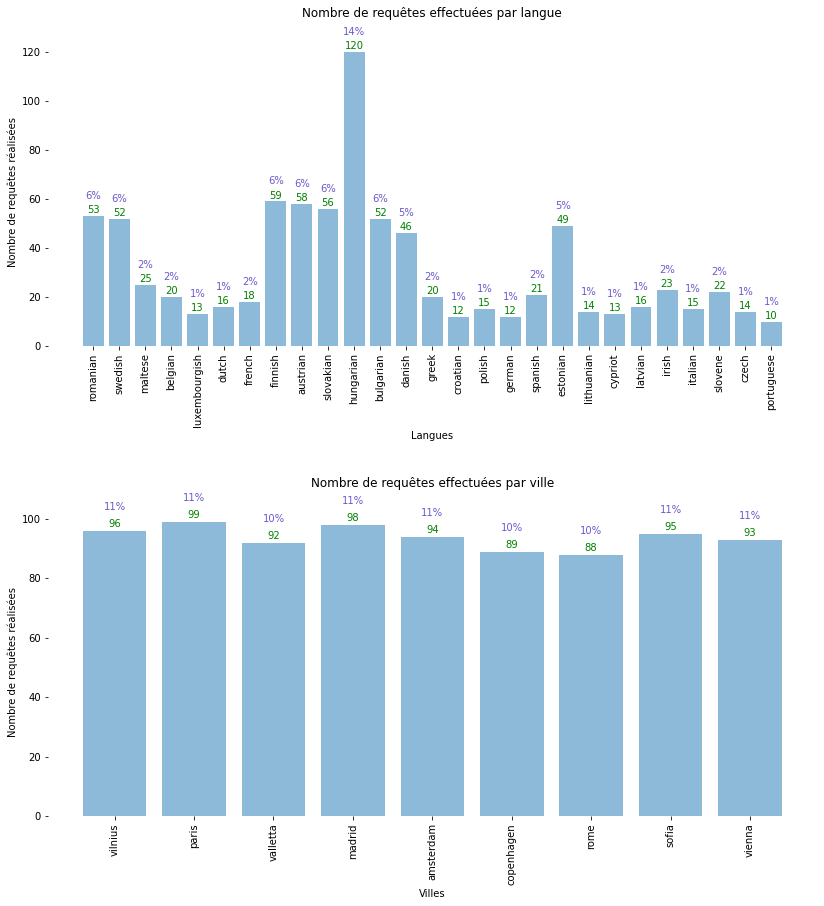

In [7]:
plotCityLanguage(data)

<font color = "blue" > Avec le premier graphe, on observe que toutes les langues (27 en tout) sont représentées dans le set de test.\
Les langues les plus présentes sont: 
- <font color = "blue" > hungarian (14%)
- <font color = "blue" > romanian, swedish, finish, austrian, slovakian, bulgarian, danish, estonian (5-6%)
- <font color = "blue" > Les autres langues ont une présence inféireure ou égale à 2%

<font color = "blue" > Avec le deuxième graphe, on observe que toutes les villes sont présentes en proportions égales dans le set de test.

### Répartition de la variable date

In [8]:
def plotDates(data):
    """
    Cette fonction trace la répartition de la variable date
    """
    
    dates_requests = data[["order_requests","date"]].drop_duplicates()
    
    fig, ax = plt.subplots(figsize=(20,8))

    counts, edges, bars = ax.hist(dates_requests.date,bins=len(dates_requests)//10, density=False,alpha = .5)

    ax.bar_label(bars,padding = 1,size = 12)
    ax.set_xticks(np.arange(0,41))
    ax.set_title("Nombre d'avatars par nombre de requêtes réalisées")
    ax.set_xlabel("valeur de date")
    ax.set_ylabel("nombre d'occurrences")

    ax.spines[['top','right','left']].set_visible(False)
    plt.show()

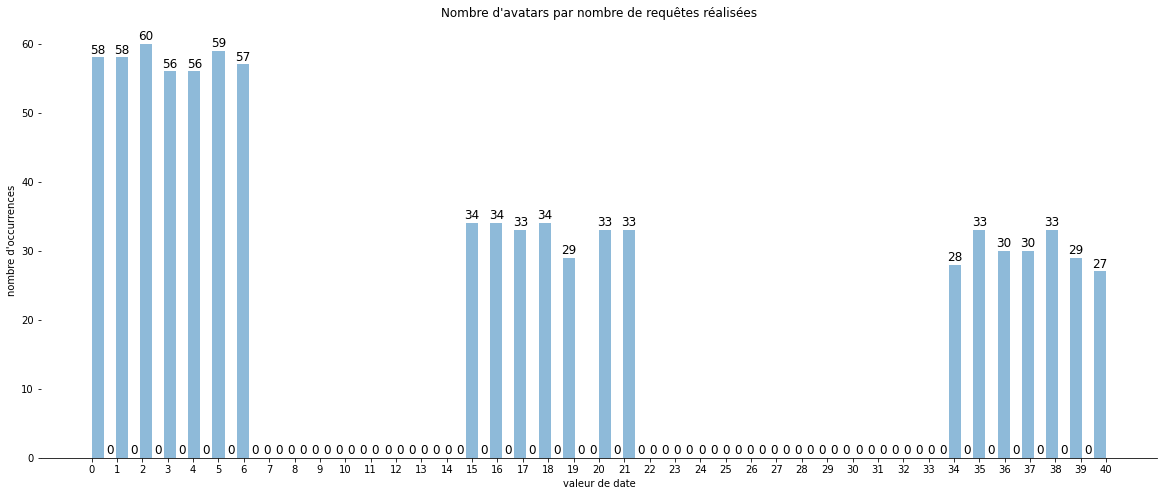

In [9]:
plotDates(data)

<font color = "blue" > Avec ce graphe, on observe que les valeurs de la variable date ne sont pas réparties uniformément. Les dates présentes sont: 
- <font color = "blue" > 0 à 6 jours (404 dates) 
- <font color = "blue" > 15 à 21 jours (230 dates)
- <font color = "blue" > 34 à 40 jours (210 dates)

### Calcul du nombre de requêtes par personne

In [16]:
# Extraction de l'information
#----------------------------------------
def computeNbRequestPerAv(data):
    """
    Cette fonction calcule le nombre d'avatars ayant réalisé ayant réalisé 1 requête, 
    le nombre d'avatars ayant réalisé 2 requête, le nombre d'avatars ayant réalisé 2 requêtes...
    
    ---> input: 
    * data (dataframe): données 
    ---> output: 
    * statsNbResquest (dataframe): 
        - en index: le nb de requêtes n
        - en valeur: le nb d'avatars ayant réalisé n requêtes
    """
    
    # Création d'une dataframe ne contenant que les colonnes 'avatar_id' et 'order_requests'.
    # On enlève les doublons: il ne reste qu'un seul exemplaire de chaque couple ('avatar_id','order_requests')
    avatar_request = data[["avatar_id","order_requests"]].drop_duplicates()
    
    # Compte le nombre de "avatar_id" identiques dans "avatar_request". 
    # On obtient un dataframe avec en index: avatar_id et en valeur: le nb de requêtes par avatar_id
    nbRequestPerAv = avatar_request["avatar_id"].value_counts() 
    
    # Compte le nombre d'avataers ayant fait 1 requête, le nombre de fois où on a fait 2 requêtes...
    statsNbRequest = nbRequestPerAv.value_counts() #.to_dict() 

    return statsNbRequest

## vérification: data.iloc[np.where(data.avatar_id == 78)] 

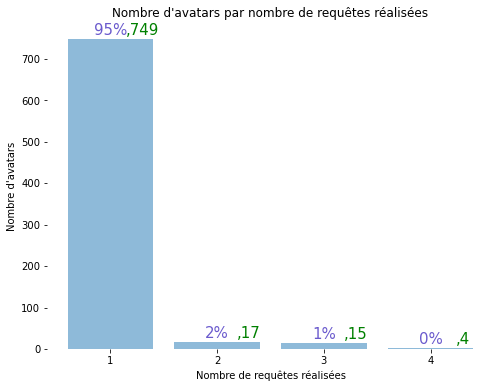

In [17]:
def plotNbRequestPerAv(data):
    """
    Cette fonction utilise le résultat de computeNbRequestPerAv() et plot un barplot du 
    nombre d'avatars par nombre de requête.
    Affiche aussi le pourcentage (en bleu) et le nombre réel (en vert) d'avatars par nb de requête.
    
    ---> input: 
    * data (dataframe): données  
    """
    statsNbRequest = computeNbRequestPerAv(data) 

    fig, ax = plt.subplots(figsize=(8,6))
    plt.bar(statsNbRequest.index, statsNbRequest.values,alpha=.5)

    ax.set_title("Nombre d'avatars par nombre de requêtes réalisées")
    ax.set_xlabel("Nombre de requêtes réalisées")
    ax.set_ylabel("Nombre d'avatars")
    plt.xticks(statsNbRequest.index)

    per = 100 * statsNbRequest.values/sum(statsNbRequest.values) 
    #calcul en pourcentage du nombre d'avatars par nombre de requêtes réalisées

    j=0
    for i, v in enumerate(statsNbRequest.values):   
        ax.text(i+1, v+10, str("%d" % per[j]) + "%" , ha="center",color = 'slateblue', size = 15, rotation = 0)  
        j+=1
        
    for i, v in enumerate(statsNbRequest.values):   
        ax.text(i+1.30, v+10, ',' + str(v) , ha="center",color = 'green', size = 15, rotation = 0) 

    ax.spines[['top','right','bottom','left']].set_visible(False)

    plt.show()
    
plotNbRequestPerAv(data)

In [31]:
statsNbRequest = computeNbRequestPerAv(data)
print("Nombre total d'avatars : ", sum(statsNbRequest))
print("Nombre d'avatars ayant fait + de 1 requête: {} soit {}%". format(
    sum(statsNbRequest.iloc[1:]), 
    round(sum(statsNbRequest.iloc[1:])*100/sum(statsNbRequest),2))
     )

Nombre total d'avatars :  785
Nombre d'avatars ayant fait + de 1 requête: 36 soit 4.59%


<font color = "blue" > On remarque que la grande majorité des avatars du set de test n'ont fait qu'une seule requête. Seulement 4,59% des avatars ont réalisé plusieurs requêtes. Le nombre de requêtes réalisé par un même avatar ne dépasse pas 4 requêtes. \
Dans un premier temps, il n'est peut-être pas pertinent de faire plusieurs requêtes pour un même avatar. 

### Calul du nombre de personnes ayant utilisé plusieurs langues pour leurs requêtes

Une requête peut être effectuée qu'en une seule langue.\
Un même avatar peut faire plusieurs requêtes et donc utiliser plusieurs langues.

In [13]:
def computeSeveralLanguage(data):
    """
    Cette fonction extrait les avatars ayant fait des requêtes dans plusieurs langues.
    
    ---> input: 
    * data (dataframe): données 
    ---> output: 
    * df_avatar_language (dataframe): contenant pour chaque avatar ayant utilisé plusiueurs langues: 
        - colonne "avatar_id": id de l'avatar ayant utilisé plusieurs langues
        - colonne "language_used": langues utilisées par de l'avatar
        - colonne "nb_requests": nombre total de requêtes envoyées par l'avatar ayant utilisé plusieurs langues
    """

    # Création d'une dataframe ne contenant que les colonnes 'avatar_id','order_requests','language'
    # On enlève les doublons: il ne reste qu'un seul exemplaire de chaque trio ('avatar_id','order_requests','langue')
    avatar_language = data[["avatar_id","order_requests","language"]].drop_duplicates()

    # Calcul d'un dataframe avec en index: avatar_id et en valeur: le nb de requêtes par avatar_id
    nbRequestPerAv = avatar_language["avatar_id"].value_counts() 

    # Calcul des ids des avatars ayant fait + de 1 requête
    idx_avatar_severalR = nbRequestPerAv.iloc[np.where(nbRequestPerAv>1)].index 

    avatars_severalL = [] #liste contenant les ids des avatars utilisant plusieurs langues
    language_used = [] #liste contenant les langues utilisées si on a trouvé que l'avatar utilise plusieurs langues
    nb_requests_a = [] #liste contenant le nb de requêtes 

    # On itère sur les avatars ayant eu + de 1 requête
    for a in idx_avatar_severalR:
        # compte le nombre de langues utilisées pour 1 avatar donné
        # on rapelle qu'à une requête correspond 1 langue
        langues = Counter(avatar_language["language"].iloc[np.where(avatar_language.avatar_id == a)]) 
        if len(langues) > 1: #si il y a utilisation de + d'un langue...
            avatars_severalL.append(a) #on sauve l'id de l'avatar utilisant plusieurs langues
            language_used.append(list(langues.keys())) #on sauve les langues utilisées 
            nb_requests_a.append(nbRequestPerAv[a])

    # Concatenate all information into a dataframe
    df_avatar_language = pd.DataFrame() 
    df_avatar_language["avatar_id"] = avatars_severalL
    df_avatar_language["language_used"] = language_used
    df_avatar_language["nb_requests"] = nb_requests_a

    return df_avatar_language

In [14]:
df_avatar_language = computeSeveralLanguage(data)
df_avatar_language

,avatar_id,language_used,nb_requests
0,789,"[czech, lithuanian]",4
1,12,"[romanian, bulgarian]",4
2,5,"[luxembourgish, dutch]",3
3,27,"[austrian, french, spanish]",3
4,4,"[belgian, luxembourgish]",3
5,6,"[belgian, french]",3
6,11,"[austrian, french]",3
7,791,"[belgian, french]",3
8,8,"[austrian, slovakian]",3
9,7,"[finnish, swedish]",2


<font color = "blue" > Parmi les 36 avatars ayant réalisé plusieurs requêtes, 1/3 des avatars (12 avatars) ont utilisé des langues différentes pour leurs requêtes. Le nombre de langues utilisé est 2, seul un avatar a tuilisé 3 langues. 

### Calul du nombre de personnes ayant utilisé le téléphone et l'ordinateur

In [15]:
def computeSeveralDevices(data):
    """
    Cette fonction extrait les avatars ayant fait des requêtes avec plusieurs devices différents
    (ordinateur et mobile)
    
    ---> input: 
    * data (dataframe): données 
    ---> outputs: 
    * df_avatar_device (dataframe): contenant pour chaque avatar ayant utilisé plusiueurs devices: 
        - colonne "avatar_id": id de l'avatar ayant utilisé plusieurs devices
        - colonne "nb_mobiles": nombre de requêtes envoyées avec un mobile
        - colonne "nb_computers": nombre de requêtes envoyées avec un ordinateur
        - colonne "nb_requests": nombre total de requêtes envoyées par l'avatar ayant utilisé plusieurs devices
    * totNb_requests  (int): nombre total de requêtes 
    * totNb_mobiles   (int): nombre total de requêtes effectuées avec un mobile
    * totNb_computers (int): nombre total de requêtes effectuées avec un ordinateur
    """

    # Création d'une dataframe ne contenant que les colonnes 'avatar_id','order_requests','mobile'
    # On enlève les doublons: il ne reste qu'un seul exemplaire de chaque trio ('avatar_id','order_requests','mobile')
    avatar_mobile = data[["avatar_id","order_requests","mobile"]].drop_duplicates()
    
    totNb_requests = len(avatar_mobile) #nombre total de requêtes 
    totNb_mobiles = Counter(avatar_mobile["mobile"].values)[0] #nombre total de requêtes effectuées avec un mobile
    totNb_computers = Counter(avatar_mobile["mobile"].values)[1]  #nombre total de requêtes effectuées avec un ordinateur

    # Calcul d'une dataframe avec en index: avatar_id et en valeur: le nb de requêtes par avatar_id
    nbRequestPerAv = avatar_mobile["avatar_id"].value_counts()

    # Calcul des ids des avatars ayant fait + de 1 requête
    idx_avatar_severalR = nbRequestPerAv.iloc[np.where(nbRequestPerAv>1)].index 


    avatars_severalD = [] #liste contenant les ids des avatars utilisant plusieurs devices (mobile et ordi)
    mobiles_used = [] #liste contenant le nb de mobiles utilisés
    computer_used = [] #liste contenant le nb d'ordinateurs utilisés
    nb_requests_a = [] #liste contenant le nb de requêtes 

    # On itère sur les avatars ayant eu + de 1 requête
    for a in idx_avatar_severalR:
        d = Counter(avatar_mobile["mobile"].iloc[np.where(avatar_mobile.avatar_id == a)])
        #dictionnaire contenant le nombre de "mobile = 1" et le nombre de "mobile = 0" (ordinateur)

        if len(d) > 1: #si l'avatar "a" a utilisé un ordi et un mobile
            avatars_severalD.append(a) #on sauve l'id de l'avatar utilisant plusieurs devices
            mobiles_used.append(d[1]) #on sauve le nb de mobiles utilisées 
            computer_used.append(d[0]) #on sauve le nb d'ordis utilisées 
            nb_requests_a.append(nbRequestPerAv[a])

    # Concatenate all information into a dataframe
    df_avatar_device = pd.DataFrame() 
    df_avatar_device["avatar_id"] = avatars_severalD
    df_avatar_device["nb_mobiles"] = mobiles_used
    df_avatar_device["nb_computers"] = computer_used
    df_avatar_device["nb_requests"] = nb_requests_a
    
    return df_avatar_device, totNb_requests, totNb_mobiles, totNb_computers

In [16]:
df_avatar_device, totNb_requests, totNb_mobiles, totNb_computers = computeSeveralDevices(data)

print("Nombre total de requêtes: ",totNb_requests)
print("Nombre total de requêtes effectuées avec un mobile: {} requêtes soit {} %".format(totNb_mobiles,
                            round(totNb_mobiles*100/totNb_requests,2)))
print("Nombre total de requêtes effectuées avec un ordinateur: {} requêtes soit {} %".format(totNb_computers,
                            round(totNb_computers*100/totNb_requests,2)))

print("\nAffichage des avatars ayant effectué des requêtes avec des devices différents (mobiles et ordinateurs): ")
df_avatar_device

Nombre total de requêtes:  844
Nombre total de requêtes effectuées avec un mobile: 453 requêtes soit 53.67 %
Nombre total de requêtes effectuées avec un ordinateur: 391 requêtes soit 46.33 %

Affichage des avatars ayant effectué des requêtes avec des devices différents (mobiles et ordinateurs): 


,avatar_id,nb_mobiles,nb_computers,nb_requests
0,794,3,1,4
1,789,1,3,4
2,12,3,1,4
3,5,2,1,3
4,13,1,2,3
5,2,2,1,3
6,793,1,2,3
7,4,1,2,3
8,6,2,1,3
9,14,2,1,3


<font color = "blue" > On observe que environ la moitié des avatars ont utilisé un ordinateur et l'autre moitié un mobile. On peut donc effectuer des requêtes avec des mobiles et des ordinateurs dans des proportions égales. 
    
<font color = "blue" > Parmi les 36 avatars qui ont effectué plusieurs requêtes, la moitié (18 avatars) ont utilisé à la fois le mobile et l'ordinateur. 